<a href="https://colab.research.google.com/github/BrunoKedzierski/Time_Series_ARMA_LSTM/blob/main/ARMA_LSTM_TIME_SERIES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pobranie danych

https://docs.zonda.exchange/v1.0.6-pl/reference/wykres

KONWERSJA CZASU

https://www.online-toolz.com/tools/unix-timestamp-to-date.php


In [ ]:
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
from statsmodels.tsa.stattools import adfuller 
!pip install pmdarima 
from pmdarima.arima.utils import ndiffs  
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt

from sklearn.metrics import mean_squared_error


from pandas.plotting import lag_plot
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

url = "https://api.zonda.exchange/rest/trading/stats"

headers = {'content-type': 'application/json'}

response = requests.request("GET", url, headers=headers)

for j in response.json()['items']:
  print('kod rynku: {}'.format(j))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.3 MB/s eta 0:00:00
kod rynku: DAI-PLN
kod rynku: USDT-GBP
kod rynku: LML-PLN
kod rynku: GRT-USDT
kod rynku: AVAX-EUR
kod rynku: ZRX-EUR
kod rynku: BTC-USDC
kod rynku: AVAX-PLN
kod rynku: DOT-BTC
kod rynku: DOGE-USDT
kod rynku: REEF-USDT
kod rynku: ALGO-USDT
kod rynku: GRT-PLN
kod rynku: XTZ-USDT
kod rynku: AMLT-PLN
kod rynku: ETH-USDC
kod rynku: BAR-PLN
kod rynku: ETH-GBP
kod rynku: XRP-BTC
kod rynku: DASH-PLN
kod rynku: USDC-GBP
kod rynku: XRP-EUR
kod rynku: SUSHI-PLN
kod rynku: BTC-USD
kod rynku: WIS-USDT
kod rynku: BOB-PLN
kod rynku: USDC-USDT
kod rynku: COMP-PLN
kod rynku: DASH-USDT
kod rynku: ATOM-USDT
kod rynku: BTC-EUR
kod rynku: REP-PLN
kod rynku: TRX-PLN
kod rynku: UNI-USDT
kod rynku: LSK-BTC
kod rynku: RNDR-USDT
kod rynku: GLM-PLN
kod rynku: DOT-PLN
kod rynku: LINK-PLN
kod rynku: ETH-BTC
kod rynku: REEF-PLN
kod rynku: D

-----------------------------
-----------------------------
-----------------------------
-----------------------------
-----------------------------
-----------------------------
-----------------------------
-----------------------------
-----------------------------
-----------------------------
-----------------------------
-----------------------------
-----------------------------
-----------------------------
-----------------------------
-----------------------------
-----------------------------
-----------------------------
-----------------------------
-----------------------------
-----------------------------
-----------------------------
-----------------------------
-----------------------------
-----------------------------
-----------------------------
-----------------------------
-----------------------------
-----------------------------
-----------------------------
-----------------------------
-----------------------------
-----------------------------
----------

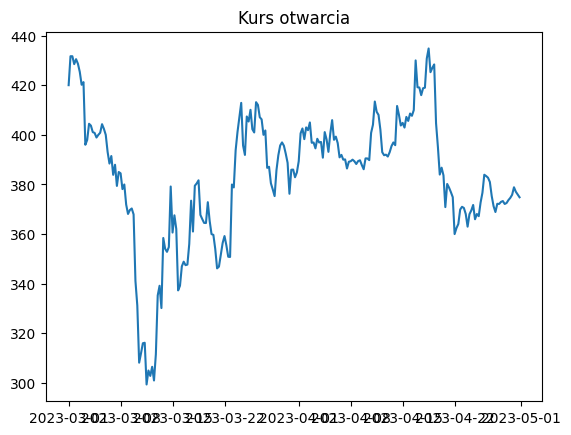

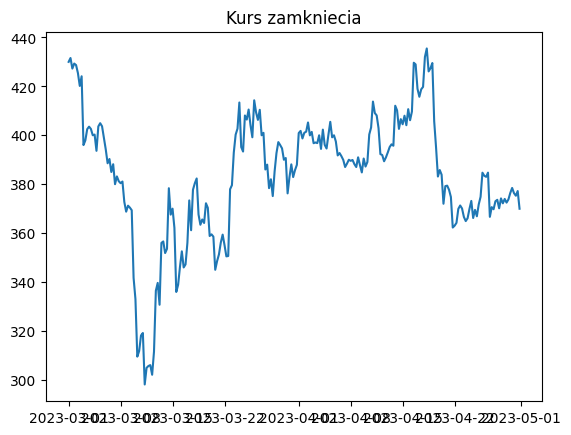

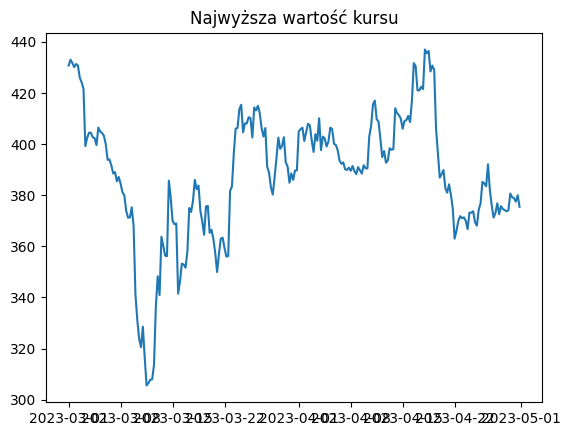

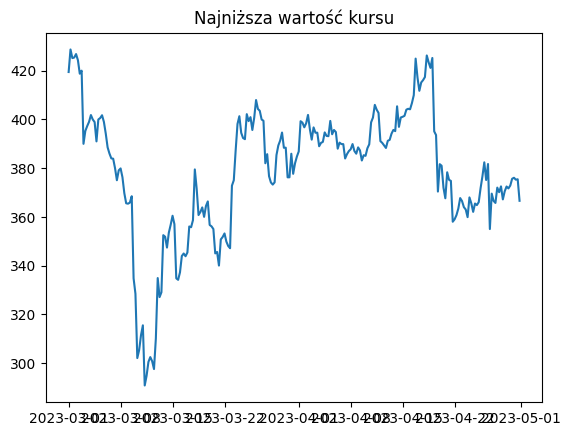

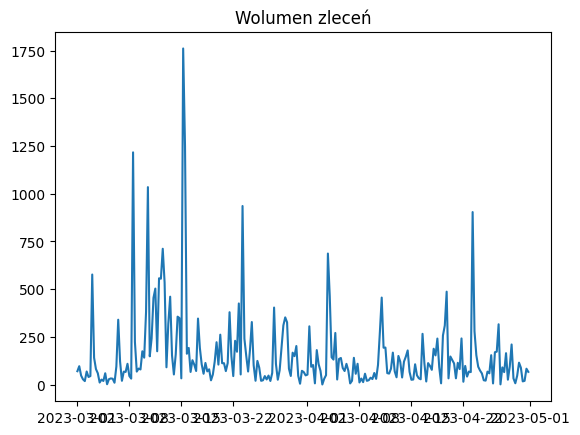

In [ ]:
import datetime 


url = "https://api.zonda.exchange/rest/trading/candle/history/LTC-PLN/21600?from=1677625200000&to=1682891999000"


#Data from 1st march to 30th april, every 6h
#61 days * 4 datapoints per day =  244 datapoints


response = requests.request("GET", url)

o = []
c = []
h = []
l = []
v = []
d = []
for j in response.json()['items']:
  print('-----------------------------')
  
  mytimestamp = datetime.datetime.fromtimestamp( int(j[0])/1000.0 )  

  datetime_string=  mytimestamp.strftime( "%Y - %m - %d  %H : %M : %S")  
  d.append(mytimestamp)
  o.append(float(j[1]['o']))
  c.append(float(j[1]['c']))
  h.append(float(j[1]['h']))
  l.append(float(j[1]['l']))
  v.append(float(j[1]['v']))

print(len(response.json()['items']))
plt.plot(d,o)
plt.title('Kurs otwarcia')
plt.show()
plt.plot(d,c)
plt.title('Kurs zamkniecia')
plt.show()
plt.plot(d,h)
plt.title('Najwyższa wartość kursu')
plt.show()
plt.plot(d,l)
plt.title('Najniższa wartość kursu')
plt.show()
plt.plot(d,v)
plt.title('Wolumen zleceń')
plt.show()

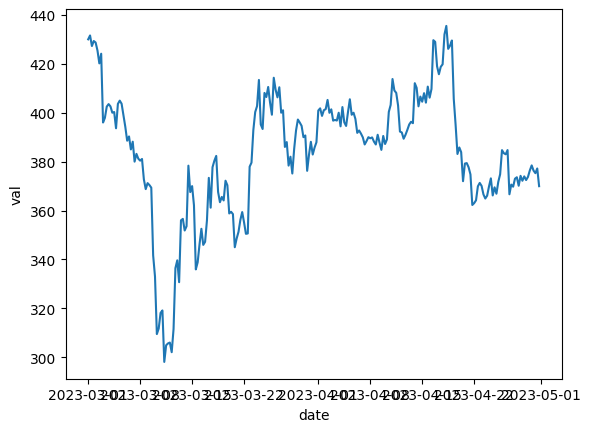

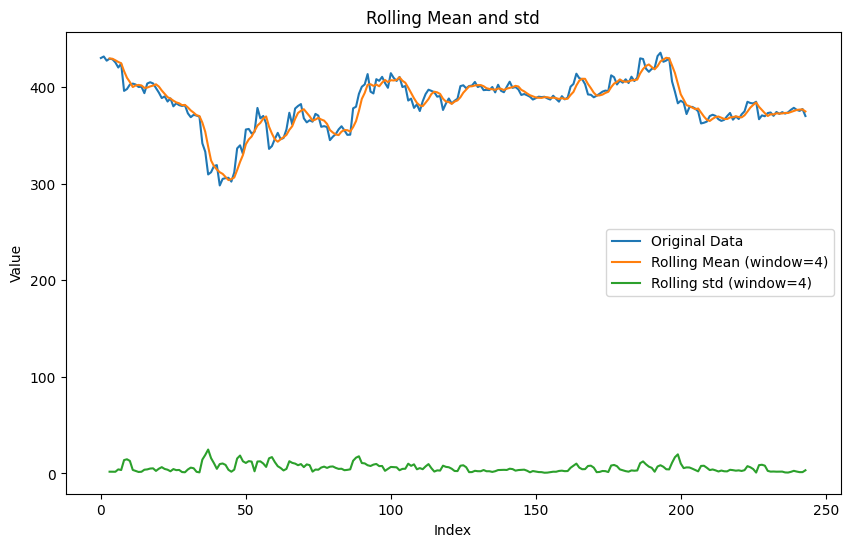

In [ ]:
#We will concenctrate on predictitng the closing price
df = pd.DataFrame((list(zip(d,c)))   , columns = ['date', 'val'])
df['date'] =  pd.to_datetime(df['date'])

sns.lineplot(df, x='date', y='val')



rolling_mean = df['val'].rolling(window=4).mean()
rolling_var = df['val'].rolling(window=4).std()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['val'], label='Original Data')
plt.plot(df.index, rolling_mean, label='Rolling Mean (window=4)')
plt.plot(df.index, rolling_var, label='Rolling std (window=4)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.title('Rolling Mean and std')
plt.show()

In [ ]:
df.to_csv('out.csv', sep='\t', encoding='utf-8', index=False)

In [ ]:
train = pd.DataFrame(df.iloc[:124]).set_index('date')


print(train.head())
print(train.tail())


test = pd.DataFrame(df.iloc[124:]).set_index('date')


print(test.head())
print(test.tail())


                        val
date                       
2023-03-01 00:00:00  430.01
2023-03-01 06:00:00  431.59
2023-03-01 12:00:00  427.27
2023-03-01 18:00:00  429.32
2023-03-02 00:00:00  428.71
                        val
date                       
2023-03-30 18:00:00  382.86
2023-03-31 00:00:00  388.10
2023-03-31 06:00:00  382.90
2023-03-31 12:00:00  385.76
2023-03-31 18:00:00  387.92
                        val
date                       
2023-04-01 00:00:00  400.91
2023-04-01 06:00:00  401.79
2023-04-01 12:00:00  398.70
2023-04-01 18:00:00  401.02
2023-04-02 00:00:00  401.47
                        val
date                       
2023-04-29 18:00:00  378.46
2023-04-30 00:00:00  376.34
2023-04-30 06:00:00  375.28
2023-04-30 12:00:00  377.20
2023-04-30 18:00:00  369.96


In [ ]:
res = adfuller(df['val'] )  
print('Augmented Dickey-Fuller Statistic: %f' % res[0])  
print('p-value: %f' % res[1])  




Augmented Dickey-Fuller Statistic: -2.700960
p-value: 0.073872


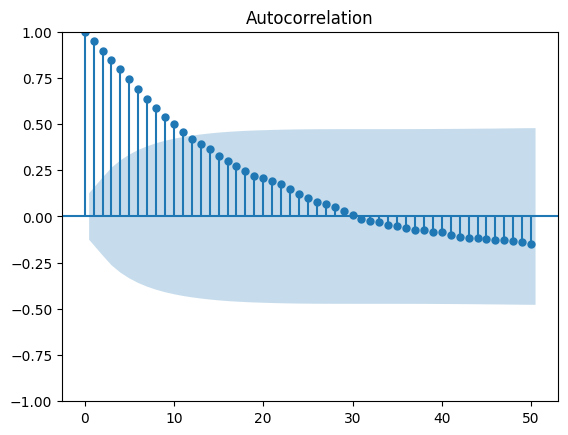

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


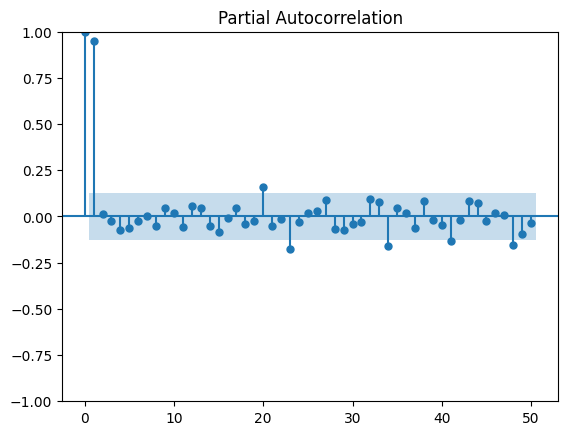

In [ ]:
plot_acf(df['val'], lags=50)
plt.show()

plot_pacf(df['val'], lags=50)
plt.show()

In [ ]:
print(train)

                        val
date                       
2023-03-01 00:00:00  430.01
2023-03-01 06:00:00  431.59
2023-03-01 12:00:00  427.27
2023-03-01 18:00:00  429.32
2023-03-02 00:00:00  428.71
...                     ...
2023-03-30 18:00:00  382.86
2023-03-31 00:00:00  388.10
2023-03-31 06:00:00  382.90
2023-03-31 12:00:00  385.76
2023-03-31 18:00:00  387.92

[124 rows x 1 columns]


In [ ]:
#Models: AR, ARMA, ARIMA
df = df.set_index('date')
ar_model = AutoReg(train, lags=10)
ar_model_fit = ar_model.fit()


arma_model = ARIMA(train,  order =(10,0,1))
arma_model_fit = arma_model.fit()



arima_model = ARIMA(train,  order = (10,1,1))
arima_model_fit = arima_model.fit()




/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 6H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 6H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 6H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 6H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Li

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


Test RMSE: 24.728
Test RMSE: 18.941
Test RMSE: 17.382


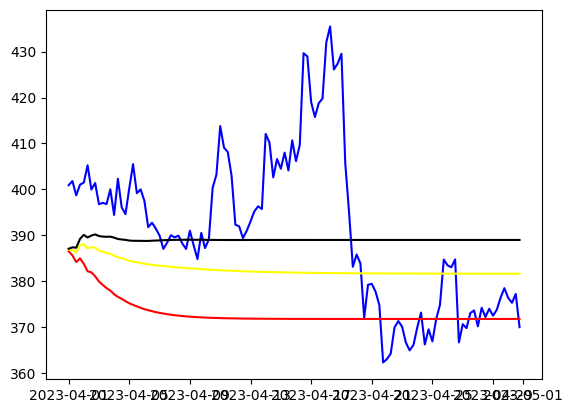

In [ ]:
predictions_arima = arima_model_fit.predict(start=test.index[0], end=test.index[-1], dynamic=False)
predictions_ar = ar_model_fit.predict(start=test.index[0], end=test.index[-1], dynamic=False)
predictions_arma = arma_model_fit.predict(start=test.index[0], end=test.index[-1], dynamic=False)





rmse_ar = sqrt(mean_squared_error(test, predictions_ar))

rmse_arma = sqrt(mean_squared_error(test, predictions_arma))
rmse_arima = sqrt(mean_squared_error(test, predictions_arima))
print('Test RMSE: %.3f' % rmse_ar)
print('Test RMSE: %.3f' % rmse_arma)
print('Test RMSE: %.3f' % rmse_arima)
# plot results
plt.plot(test, color='blue')
plt.plot(predictions_ar, color='red')
plt.plot(predictions_arma, color='yellow')
plt.plot(predictions_arima, color='black')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train)
scaler.fit(test)

scaled_train_dates = scaler.transform(train)
scaled_test_dates = scaler.transform(test)

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 10
n_features = 1
generated_batches = TimeseriesGenerator(scaled_train_dates, scaled_train_dates, length=n_input, batch_size=1)

In [ ]:

lstm_model = Sequential()
lstm_model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features), return_sequences=True))
lstm_model.add(LSTM(50, activation='relu', return_sequences=True))
lstm_model.add(LSTM(20, activation='relu'))

lstm_model.add(Dense(1))

lstm_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.002), loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
history = lstm_model.fit(generated_batches,epochs=80)

Epoch 1/80
114/114 [==============================] - 7s 15ms/step - loss: 0.1534 - root_mean_squared_error: 0.3917
Epoch 2/80
114/114 [==============================] - 2s 16ms/step - loss: 0.1088 - root_mean_squared_error: 0.3299
Epoch 3/80
114/114 [==============================] - 2s 15ms/step - loss: 0.0870 - root_mean_squared_error: 0.2950
Epoch 4/80
114/114 [==============================] - 2s 16ms/step - loss: 0.0685 - root_mean_squared_error: 0.2618
Epoch 5/80
114/114 [==============================] - 3s 23ms/step - loss: 0.0509 - root_mean_squared_error: 0.2256
Epoch 6/80
114/114 [==============================] - 2s 15ms/step - loss: 0.0456 - root_mean_squared_error: 0.2134
Epoch 7/80
114/114 [==============================] - 2s 15ms/step - loss: 0.0379 - root_mean_squared_error: 0.1946
Epoch 8/80
114/114 [==============================] - 2s 16ms/step - loss: 0.0292 - root_mean_squared_error: 0.1709
Epoch 9/80
114/114 [==============================] - 2s 15ms/step - los

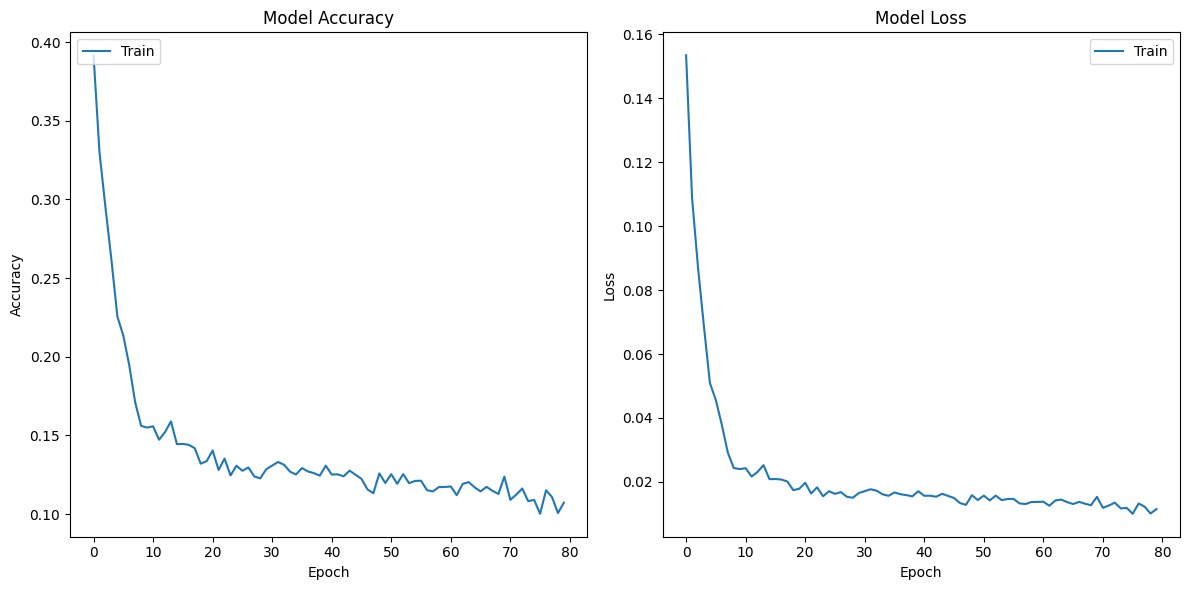

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['root_mean_squared_error'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:


test_batches = scaled_train_dates[-n_input:]
reshaping_batches = test_batches.reshape((1, n_input, n_features))

testPredict = lstm_model.predict(scaled_test_dates)


4/4 [==============================] - 1s 5ms/step


Test Score: 28.84 RMSE


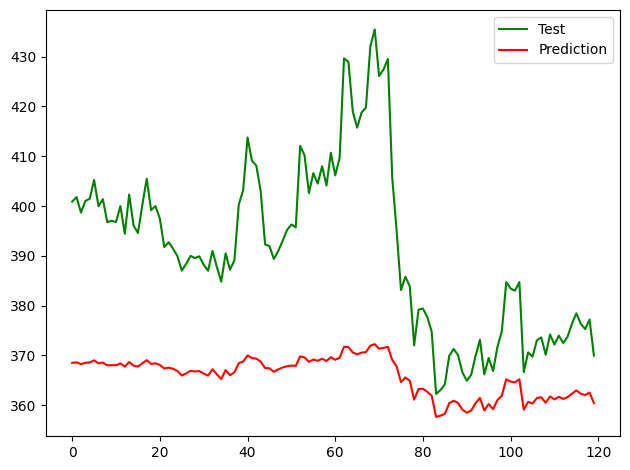

In [ ]:


actual_values = scaler.inverse_transform(testPredict)
testScore = np.sqrt(mean_squared_error(test, actual_values))
print('Test Score: %.2f RMSE' % (testScore))

plt.plot(test['val'].tolist(), color ='green')
plt.plot(actual_values, color ='red')
plt.legend(['Test', 'Prediction'], loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()

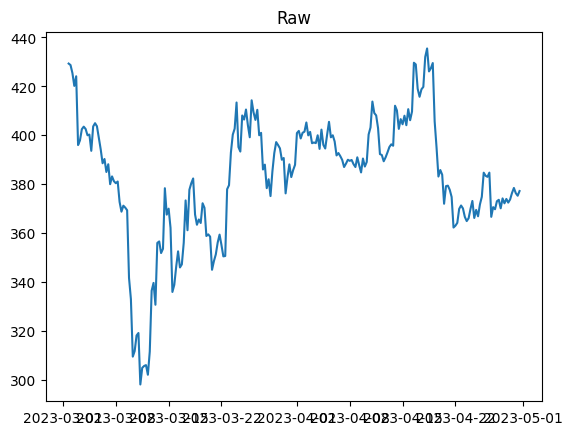

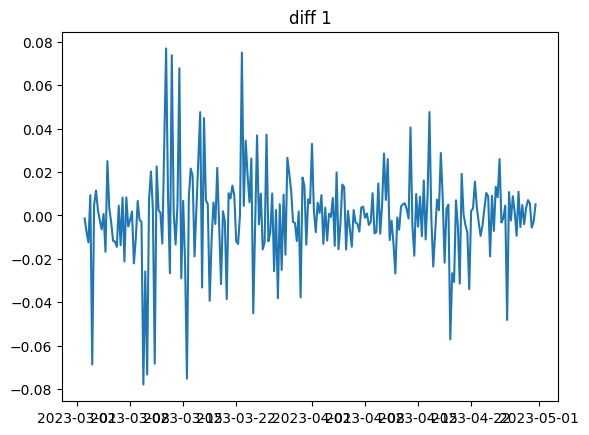

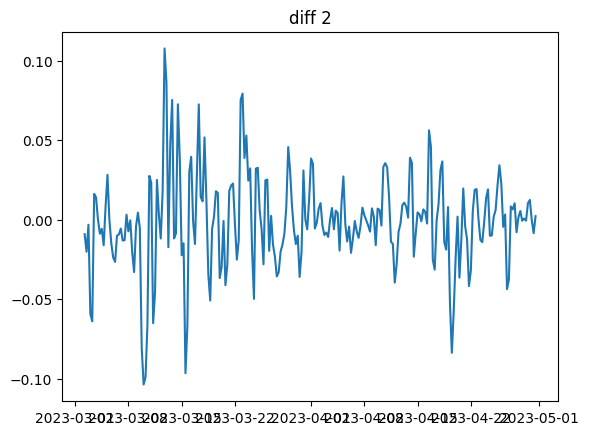

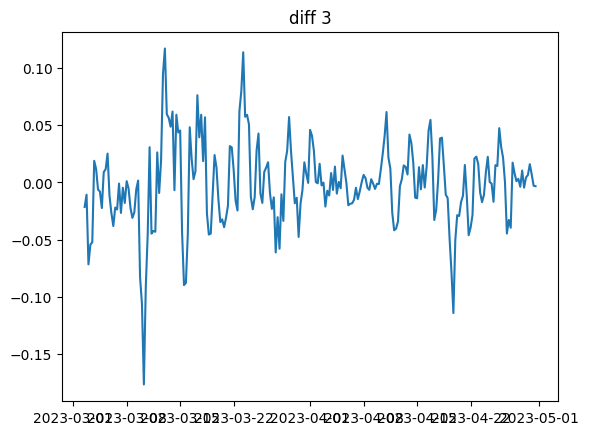

In [ ]:
import numpy as np
import pandas as pd 

df = pd.DataFrame((list(zip(d,c)))   , columns = ['date', 'val'])
df['diff_1'] = np.log(df['val']).diff(periods=1)
df['diff_2'] = np.log(df['val']).diff(periods=2)
df['diff_3'] = np.log(df['val']).diff(periods=3)


df.head()





plt.plot(df['date'],df['val'])
plt.title('Raw')
plt.show()

plt.plot(df['date'],df['diff_1'])
plt.title('diff 1')
plt.show()

plt.plot(df['date'],df['diff_2'])
plt.title('diff 2')
plt.show()

plt.plot(df['date'],df['diff_3'])
plt.title('diff 3')
plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Augmented Dickey-Fuller Statistic: -2.751109
p-value: 0.065604
Augmented Dickey-Fuller Statistic: -15.850415
p-value: 0.000000


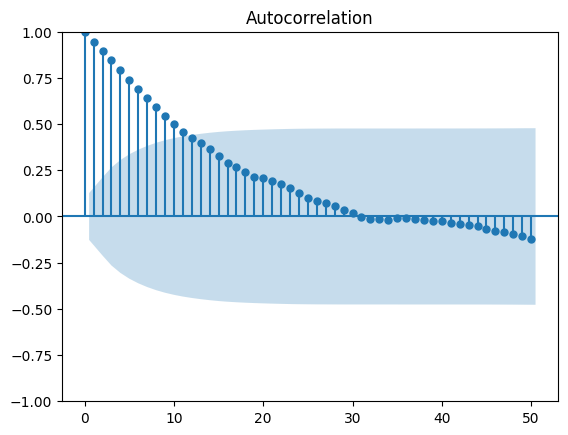

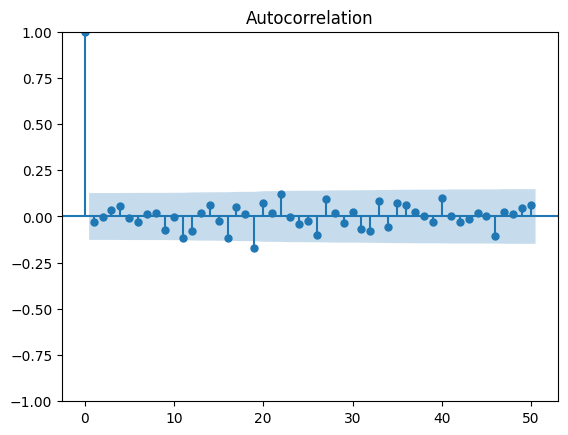

In [ ]:







res = adfuller(df['val'] )  
print('Augmented Dickey-Fuller Statistic: %f' % res[0])  
print('p-value: %f' % res[1])  

res = adfuller(df['diff_1'].dropna() )  
print('Augmented Dickey-Fuller Statistic: %f' % res[0])  
print('p-value: %f' % res[1])  


plot_acf(df['val'], lags=50)
plt.show()

plot_acf(df['diff_1'].dropna(), lags=50)
plt.show()

In [ ]:
print(len(df))

240


Coefficients: const      17.711481
val.L1      0.933529
val.L2      0.034477
val.L3      0.040225
val.L4      0.019968
val.L5     -0.053347
val.L6      0.003028
val.L7      0.005275
val.L8     -0.018627
val.L9     -0.086414
val.L10     0.075863
dtype: float64
192    423.363260
193    422.557194
194    421.638579
195    419.781420
196    417.975357
197    416.224242
198    413.374552
199    411.378922
200    410.528204
201    409.142289
202    407.638528
203    406.302886
204    405.144476
205    404.000958
206    402.937977
207    402.055077
208    401.156584
209    400.219537
210    399.390742
211    398.627778
212    397.892084
213    397.186666
214    396.528878
215    395.903853
216    395.300267
217    394.735390
218    394.208603
219    393.704413
220    393.225191
221    392.773640
222    392.347189
223    391.942350
224    391.559658
225    391.198799
226    390.856747
227    390.532425
228    390.226167
229    389.936633
230    389.662474
231    389.403032
232    389.157744
23

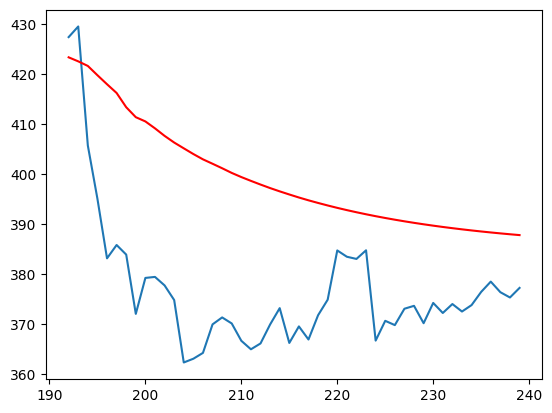

In [ ]:



X = df['val']
train, test = X[:len(X)-48], X[len(X)-48:]

model = AutoReg(train, lags=10)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)


predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

print(predictions)
print(test)
for pred,true in zip(predictions,test):
	print(f'predicted={pred}, expected={true}, error {abs(pred - true)}')
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

#1. Dla notowań giełdowych kryptowaluty zaproponuj i zrealizuj selekcje danych, format danych oraz podział tych danych na dane treningowe i dane testowe. Zacznij od jednego typu danych wejściowych (wybierz spośród 

1.   Kurs otwarcia
1.   Kurs zamkniecia
2.   Najwyższa wartość kursu
2.   Najniższa wartość kursu

lub ich kombinacji, np. średniej).


#2. Zaproponuj liniowy model autoregresyjny (model AR) biorący pod uwagę kilka wcześniejszych notowań (nie więcej niż 50). Określ parametry modelu stosując metodę najmniejszych kwadratów. Zweryfikuj poprawność modelu.

#3. Zaproponuj sieć neuronową rekurencyjną do predykcji notowań. Wytrenuj sieć (zastosuj znane ci techniki trenowania sieci jak porzucanie, skalowanie etc.). Zweryfikuj poprawność modelu.

In [ ]:
model.add(LSTM(100))
model.add(Dropout(0.4))

#4. Do predykcji notowań użyj dodatkowych danych, dostępnych w json powyższego API.

#5. Porównaj modele AR i rekurencyjne sieci neuronowe.